### Plot functions usages

In [1]:
import mujoco
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass
from util import rpy2r,get_rotation_matrix_from_two_points,TicTocClass
np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo version:[%s]"%(mujoco.__version__))

MuJoCo version:[2.3.6]


### Parse `floor_sky.xml`

In [2]:
xml_path = '../asset/object/floor_sky.xml'
env = MuJoCoParserClass(name='Floor',rel_xml_path=xml_path,VERBOSE=True)

dt:[0.0020] HZ:[500]
n_dof (=nv):[0]
n_geom:[1]
geom_names:['floor']
n_body:[1]
body_names:['world']
n_joint:[0]
joint_names:[]
joint_types:[]
joint_ranges:
[]
n_rev_joint:[0]
rev_joint_idxs:[]
rev_joint_names:[]
rev_joint_mins:[]
rev_joint_maxs:[]
rev_joint_ranges:[]
n_pri_joint:[0]
pri_joint_idxs:[]
pri_joint_names:[]
pri_joint_mins:[]
pri_joint_maxs:[]
pri_joint_ranges:[]
n_ctrl:[0]
ctrl_names:[]
ctrl_joint_idxs:[]
ctrl_joint_names:[]
ctrl_qvel_idxs:[]
ctrl_ranges:
[]
n_sensor:[0]
sensor_names:[]
n_site:[0]
site_names:[]


### Render

Pressed ESC
Quitting.


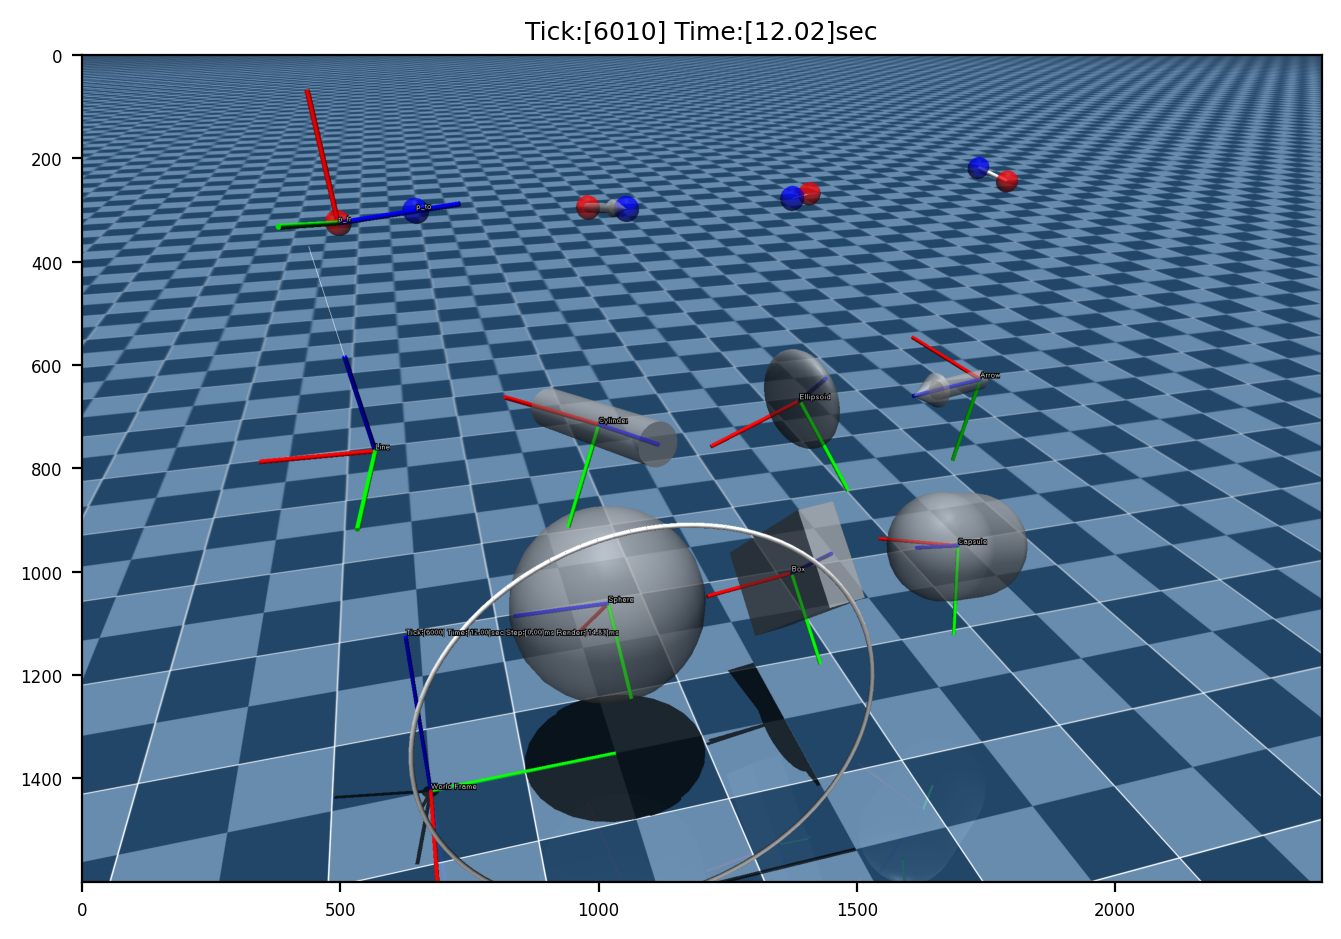

Done.


In [3]:
env.init_viewer(viewer_title='UR5e',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True,FONTSCALE_VALUE=100)
env.update_viewer(azimuth=177,distance=4.5,elevation=-23,lookat=[0.0, 1.5, 1.7],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=True,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=True,jointlength=0.5,jointwidth=0.1,
                  jointrgba=[0.2,0.6,0.8,0.6])
env.reset()

# Set position and orientation of objects
p_sphere     = np.array([0,1,1])
R_sphere     = rpy2r(np.radians([80,10,10]))
r_sphere     = 0.5 # sphere radius

p_box        = np.array([0,2,1])
R_box        = rpy2r(np.radians([30,40,50]))
xlen_box     = 0.1
ylen_box     = 0.25
zlen_box     = 0.5

p_capsule    = np.array([0,3,1])
R_capsule    = rpy2r(np.radians([60,40,10]))
h_capsule    = 0.2 # capsule height
r_capsule    = 0.3 # capsule radius

p_cylinder   = np.array([0,1,2])
R_cylinder   = rpy2r(np.radians([10,80,30]))
h_cylinder   = 0.5 # cylinder height
r_cylinder   = 0.1 # cylinder radius

p_ellipsoid  = np.array([0,2,2])
R_ellipsoid  = rpy2r(np.radians([50,30,60]))
rx_ellipsoid = 0.1 
ry_ellipsoid = 0.25 
rz_ellipsoid = 0.5 

p_arrow      = np.array([0,3,2])
R_arrow      = rpy2r(np.radians([80,70,10]))
r_arrow      = 0.05
h_arrow      = 0.5

p_line       = np.array([0,0,2])
R_line       = rpy2r(np.radians([10,10,20]))
h_line       = 1.0

center       = np.array([1,1,1])
radius       = 1.0
n_pnt        = 100
theta        = np.linspace(0,2*np.pi,n_pnt)
x = np.repeat(center[0],n_pnt)
y = center[1] + radius*np.cos(theta)
z = center[2] + radius*np.sin(theta)
traj         = np.column_stack((x.ravel(),y.ravel(),z.ravel())) # [100 x 3]

tt_step   = TicTocClass(name='step')
tt_render = TicTocClass(name='render')
while (env.get_sim_time() < 100.0) and env.is_viewer_alive():
    # Step
    tt_step.tic()
    env.step()
    tt_step.toc(VERBOSE=False,RETURN=False)
    
    # Modify font_scale based on cam_dist
    # envfr
    # Render
    if (env.tick%10) == 0:
        
        tt_render.tic() # tic
        
        # Rotate locally
        R_local = rpy2r(np.radians([0,0,env.tick])) # deg per tick
        
        # Frame
        env.plot_T(p=np.zeros(3,),R=np.eye(3),
                   PLOT_AXIS=True,axis_len=1.0,axis_width=0.01,
                   PLOT_SPHERE=False,sphere_r=0.05,sphere_rgba=[1,0,0,0.5],
                   label='World Frame')
        # Text
        env.plot_T(p=np.array([0,0,1]),R=np.eye(3),PLOT_AXIS=False,
                   label='Tick:[%d] Time:[%.2f]sec Step:[%.2f]ms Render:[%.2f]ms'%
                   (env.tick,env.get_sim_time(),1000*tt_step.time_elapsed,
                    1000*tt_render.time_elapsed))
        
        # Sphere
        env.plot_T(p=p_sphere,R=R_sphere@R_local,PLOT_AXIS=True,axis_len=0.5,
                   label='Sphere')
        env.plot_sphere(p=p_sphere,r=r_sphere,rgba=[0.5,0.5,0.5,0.5])
        
        # Box
        env.plot_T(p=p_box,R=R_box@R_local,PLOT_AXIS=True,axis_len=0.5,label='Box')
        env.plot_box(p=p_box,R=R_box@R_local,xlen=xlen_box,ylen=ylen_box,zlen=zlen_box,
                     rgba=[0.5,0.5,0.5,0.5])
        
        # Capsule
        env.plot_T(p=p_capsule,R=R_capsule@R_local,PLOT_AXIS=True,axis_len=0.5,
                   label='Capsule')
        env.plot_capsule(p=p_capsule,R=R_capsule@R_local,r=r_capsule,h=h_capsule,
                         rgba=[0.5,0.5,0.5,0.5])
        
        # Cylinder
        env.plot_T(p=p_cylinder,R=R_cylinder@R_local,PLOT_AXIS=True,axis_len=0.5,
                   label='Cylinder')
        env.plot_cylinder(p=p_cylinder,R=R_cylinder@R_local,r=r_cylinder,h=h_cylinder,
                         rgba=[0.5,0.5,0.5,0.5])
        
        # Ellipsoid
        env.plot_T(p=p_ellipsoid,R=R_ellipsoid@R_local,PLOT_AXIS=True,axis_len=0.5,
                   label='Ellipsoid')
        env.plot_ellipsoid(p=p_ellipsoid,R=R_ellipsoid@R_local,
                           rx=rx_ellipsoid,ry=ry_ellipsoid,rz=rz_ellipsoid,
                           rgba=[0.5,0.5,0.5,0.5])

        # Arrow
        env.plot_T(p=p_arrow,R=R_arrow@R_local,PLOT_AXIS=True,axis_len=0.5,
                   label='Arrow')
        env.plot_arrow(p=p_arrow,R=R_arrow@R_local,r=r_arrow,h=h_arrow,
                       rgba=[0.5,0.5,0.5,0.5])
        
        # Line
        env.plot_T(p=p_line,R=R_line@R_local,PLOT_AXIS=True,axis_len=0.5,
                   label='Line')
        env.plot_line(p=p_line,R=R_line,h=h_line,rgba=[0.9,0.9,0.9,1.0])
        
        # Get rotational matrix whose z-axis is aligned with a line p_fr-p_to
        p_fr = np.array([0,0,3])
        p_to = p_fr+np.array([0.1,0.3,0.05])
        R_fr2to = get_rotation_matrix_from_two_points(p_fr=p_fr,p_to=p_to)
        env.plot_sphere(p=p_fr,r=0.05,rgba=[1.0,0.0,0.0,0.5],label='p_fr')
        env.plot_sphere(p=p_to,r=0.05,rgba=[0.0,0.0,1.0,0.5],label='p_to')
        env.plot_T(p=p_fr,R=R_fr2to@R_local,PLOT_AXIS=True,axis_len=0.5,label='')
        
        # Plot arrow from p_fr to p_to
        p_fr = np.array([0,1,3])
        p_to = p_fr+np.array([0.3,0.1,0.05])
        env.plot_sphere(p=p_fr,r=0.05,rgba=[1.0,0.0,0.0,0.5],label='')
        env.plot_sphere(p=p_to,r=0.05,rgba=[0.0,0.0,1.0,0.5],label='')
        env.plot_arrow_fr2to(p_fr=p_fr,p_to=p_to,r=0.02,rgba=[0.5,0.5,0.5,0.5])
        
        # Plot line from p_fr to p_to
        p_fr = np.array([0,2,3])
        p_to = p_fr+np.array([0.3,-0.2,0.05])
        env.plot_sphere(p=p_fr,r=0.05,rgba=[1.0,0.0,0.0,0.5],label='')
        env.plot_sphere(p=p_to,r=0.05,rgba=[0.0,0.0,1.0,0.5],label='')
        env.plot_line_fr2to(p_fr=p_fr,p_to=p_to,rgba=[0.9,0.9,0.9,1.0])
        
        # Plot cylinder from p_fr to p_to
        p_fr = np.array([0,3,3])
        p_to = p_fr+np.array([-0.1,-0.1,0.05])
        env.plot_sphere(p=p_fr,r=0.05,rgba=[1.0,0.0,0.0,0.5],label='')
        env.plot_sphere(p=p_to,r=0.05,rgba=[0.0,0.0,1.0,0.5],label='')
        env.plot_cylinder_fr2to(p_fr=p_fr,p_to=p_to,r=0.01,rgba=[0.9,0.9,0.9,1.0])
        
        # Trajectory (sequence of points)
        for p_idx in range(traj.shape[0]-1):
            p_fr,p_to = traj[p_idx],traj[p_idx+1]
            env.plot_cylinder_fr2to(p_fr=p_fr,p_to=p_to,r=0.01,rgba=[0.9,0.9,0.9,1.0])
        
        # Render happens here
        env.render()
        
        # Check time for rendering
        tt_render.toc(VERBOSE=False,RETURN=False)
        
    # Save the current view
    if env.loop_every(HZ=10): scene_img = env.grab_image()
        
# Plot the final scene1
plt.figure(figsize=(8,6)); plt.imshow(scene_img)
plt.title("Tick:[%d] Time:[%.2f]sec"%(env.tick,env.get_sim_time()),fontsize=9)
plt.show()
# Close viewer
env.close_viewer()
print ("Done.") 